In [72]:
from astropy.table import Table, Column
import numpy as np
from numpy.linalg import inv 
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request

In [73]:
os.chdir("/Users/Roberto Benard Orci/Documents/Python Scripts")
os.getcwd()

'C:\\Users\\Roberto Benard Orci\\Documents\\Python Scripts'

In [74]:
# Importing data form file "Table1.txt" to save it on the array "Table1".

Table1 = np.loadtxt(fname = "/Users/Roberto Benard Orci/Documents/Python Scripts/Table1.txt")

column_names = ['ID', 'x', 'y','Sigma y', 'Sigma x', 'Rho xy']

Table1 = pd.DataFrame(Table1, columns=column_names)

In [75]:
# Making transpose matrix Y fisrt since it's easier to put a column form
# Table1 into a row, then we transpose that matrix to get matrix Y.

Matrix_Y_Transpose = np.array([Table1['y']])

Matrix_Y = Matrix_Y_Transpose.transpose()

In [76]:
# To get the number of ones we need in a column for matrix A, we find the
# highest index, the we add one since the index start counting at zero.

LineOfOnes = np.linspace(1, 1, Table1['ID'].idxmax()+1)
#Could also use np.size(Table1['ID']) instead of Table1['ID'].idxmax()+1

Matrix_A_Transpose = np.array([LineOfOnes,Table1['x']])

Matrix_A = Matrix_A_Transpose.transpose()

Covariance_Matrix = np.diag(Table1['Sigma y']*Table1['Sigma y'])

Covariance_Matrix_Inverse = inv(Covariance_Matrix)

In [77]:
# First we multiply matrix A transpose times the inverse of the covariance
# matrix (we'll call this result matrix B), then we multiply matrix B times
# matrix A and take it's inverse, afterwards we multiply matrix B and Y.
# Finally, we multiply the first result times the second one in order to 
# get matrix X, which contains terms m and b.

MAT_times_CMI = np.matmul(Matrix_A_Transpose,Covariance_Matrix_Inverse)

MAT_CMI_times_MA = np.matmul(MAT_times_CMI,Matrix_A)

MAT_CMI_times_MA_Inverse = inv(MAT_CMI_times_MA)

MAT_CMI_times_MY = np.matmul(MAT_times_CMI,Matrix_Y)

Matrix_X = np.matmul(MAT_CMI_times_MA_Inverse,MAT_CMI_times_MY)

In [78]:
b = Matrix_X[0].item()
m = Matrix_X[1].item()

print(m,b)

1.0767475241683222 213.2734919759614


In [79]:
def f(t):
    return t*m +b

t3 = np.arange(0.0, 300.0, 0.1)
t4 = np.arange(0.0, 300.0, 0.02)

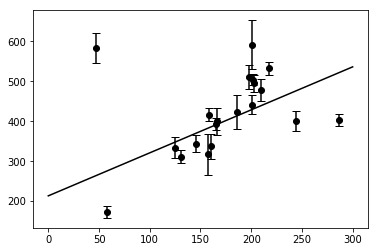

In [80]:
error = Table1['Sigma y']
plt.errorbar(Table1['x'], Table1['y'], yerr=error, fmt='ko',capsize=4)
plt.plot(t4, f(t4), 'k')